# Ejemplos de análisis de datos usando Spark RDDs

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oramosul/abd-files/blob/main/spark/1-spark-rdd/3-Ejemplos-RDDs.ipynb)

In [ ]:
!pip install -q pyspark

In [2]:
from pyspark import SparkContext
sc = SparkContext("local[1]", "ejemplos_analisis_rdd")

Se descargará los archivos que se requiere para estos ejemplos. Alternativamente, pueden ser cargados manualmente. Si se trabaja en un clúster, estos archivos deberían encontrarse en el clúster, por ejemplo de HDFS, y se debe brindar la ruta hacia los archivos.

In [3]:
!wget -q https://raw.githubusercontent.com/oramosul/abd-files/main/spark/datos/texto-prueba.txt
!wget -q https://raw.githubusercontent.com/oramosul/abd-files/main/spark/datos/DowJones19.csv
!wget -q https://raw.githubusercontent.com/oramosul/abd-files/main/spark/datos/u.data

## **Ejemplo 1**

In [4]:
# Lectura del archivo
rdd = sc.textFile("texto-prueba.txt")
rdd.collect()

['Este es un texto de prueba',
 'Para utilizar algunas Funcionalidades de Spark',
 'Usaremos Spark con Python',
 'Spark puede usar Python o Scala',
 'Es posible Usar otros lenguajes como Java O R',
 'En este caso usaremos Python']

In [5]:
# Separar por palabras en cada línea
rdd.map(lambda x: x.lower().split(' ')).collect()

[['este', 'es', 'un', 'texto', 'de', 'prueba'],
 ['para', 'utilizar', 'algunas', 'funcionalidades', 'de', 'spark'],
 ['usaremos', 'spark', 'con', 'python'],
 ['spark', 'puede', 'usar', 'python', 'o', 'scala'],
 ['es', 'posible', 'usar', 'otros', 'lenguajes', 'como', 'java', 'o', 'r'],
 ['en', 'este', 'caso', 'usaremos', 'python']]

In [6]:
# Similar a la función lambda anterior, pero usando una función con nombre
def funcion1(x):
  y = x.lower()
  z = y.split(' ')
  return z

rdd2 = rdd.map(funcion1)

In [7]:
# Filtrar los RDDs donde aparece la palabra Python
rdd2.filter(lambda x: "python" in x).collect()

[['usaremos', 'spark', 'con', 'python'],
 ['spark', 'puede', 'usar', 'python', 'o', 'scala'],
 ['en', 'este', 'caso', 'usaremos', 'python']]

In [8]:
# Almacenar un RDD (se especifica el nombre de la carpeta)
rdd2.saveAsTextFile("/content/salida")

In [9]:
# Dividir las palabras sin estructura ("flat")
rdd3 = rdd.flatMap(lambda x: x.lower().split())
# Mostrar solo las 10 primeras
rdd3.take(10)

['este',
 'es',
 'un',
 'texto',
 'de',
 'prueba',
 'para',
 'utilizar',
 'algunas',
 'funcionalidades']

In [10]:
# Palabras que se eliminará
stop_words = ["este", "de", "es", "un"]
# Filtraje: mantener solo las palabras que no estén en "stop_words"
rdd4 = rdd3.filter(lambda x: x not in stop_words)

#rdd4.distinct().collect()
rdd4.collect()

['texto',
 'prueba',
 'para',
 'utilizar',
 'algunas',
 'funcionalidades',
 'spark',
 'usaremos',
 'spark',
 'con',
 'python',
 'spark',
 'puede',
 'usar',
 'python',
 'o',
 'scala',
 'posible',
 'usar',
 'otros',
 'lenguajes',
 'como',
 'java',
 'o',
 'r',
 'en',
 'caso',
 'usaremos',
 'python']

In [11]:
# Se desea solo las palabras que comienzan con s
rdd5 = rdd3.filter(lambda x: x.startswith('s'))
rdd5.collect()

['spark', 'spark', 'spark', 'scala']

In [12]:
# Quedarse solo con los elementos que son diferentes
rdd5.distinct().collect()

['spark', 'scala']

## **Ejemplo 2**

In [13]:
rdd0 = sc.textFile("texto-prueba.txt")
rdd = rdd0.flatMap(lambda x: x.lower().split(' '))
rdd.take(10)

['este',
 'es',
 'un',
 'texto',
 'de',
 'prueba',
 'para',
 'utilizar',
 'algunas',
 'funcionalidades']

In [14]:
# Número de elementos en el RDD
rdd.count()

36

In [15]:
# Agrupar según primera letra
rdd2 = rdd.groupBy(lambda x: x[0])
rdd2.collect()

[('e', <pyspark.resultiterable.ResultIterable at 0x7b31e4237d60>),
 ('u', <pyspark.resultiterable.ResultIterable at 0x7b31e4237790>),
 ('t', <pyspark.resultiterable.ResultIterable at 0x7b31c2c24940>),
 ('d', <pyspark.resultiterable.ResultIterable at 0x7b31c2c24520>),
 ('p', <pyspark.resultiterable.ResultIterable at 0x7b31c2c245b0>),
 ('a', <pyspark.resultiterable.ResultIterable at 0x7b31c2c24850>),
 ('f', <pyspark.resultiterable.ResultIterable at 0x7b31c2c24100>),
 ('s', <pyspark.resultiterable.ResultIterable at 0x7b31c2c25960>),
 ('c', <pyspark.resultiterable.ResultIterable at 0x7b31c2c259c0>),
 ('o', <pyspark.resultiterable.ResultIterable at 0x7b31c2c25a20>),
 ('l', <pyspark.resultiterable.ResultIterable at 0x7b31c2c25a80>),
 ('j', <pyspark.resultiterable.ResultIterable at 0x7b31c2c25ae0>),
 ('r', <pyspark.resultiterable.ResultIterable at 0x7b31c2c25b40>)]

In [16]:
# Convertir en lista los valores que son iterables (para poder mostrarlos)
rdd2.mapValues(list).collect()

[('e', ['este', 'es', 'es', 'en', 'este']),
 ('u', ['un', 'utilizar', 'usaremos', 'usar', 'usar', 'usaremos']),
 ('t', ['texto']),
 ('d', ['de', 'de']),
 ('p', ['prueba', 'para', 'python', 'puede', 'python', 'posible', 'python']),
 ('a', ['algunas']),
 ('f', ['funcionalidades']),
 ('s', ['spark', 'spark', 'spark', 'scala']),
 ('c', ['con', 'como', 'caso']),
 ('o', ['o', 'otros', 'o']),
 ('l', ['lenguajes']),
 ('j', ['java']),
 ('r', ['r'])]

In [17]:
# Similar al anterior, pero usando herramientas nativas de Python
[(k, list(v))  for (k, v) in rdd2.collect()]

[('e', ['este', 'es', 'es', 'en', 'este']),
 ('u', ['un', 'utilizar', 'usaremos', 'usar', 'usar', 'usaremos']),
 ('t', ['texto']),
 ('d', ['de', 'de']),
 ('p', ['prueba', 'para', 'python', 'puede', 'python', 'posible', 'python']),
 ('a', ['algunas']),
 ('f', ['funcionalidades']),
 ('s', ['spark', 'spark', 'spark', 'scala']),
 ('c', ['con', 'como', 'caso']),
 ('o', ['o', 'otros', 'o']),
 ('l', ['lenguajes']),
 ('j', ['java']),
 ('r', ['r'])]

## **Ejemplo 3**

In [18]:
rdd = sc.textFile("u.data")
rdd.take(3)

['196\t242\t3\t881250949', '186\t302\t3\t891717742', '22\t377\t1\t878887116']

In [19]:
# Separar cada línea a partir de las comas
rdd.map(lambda x: x.split()).take(3)

[['196', '242', '3', '881250949'],
 ['186', '302', '3', '891717742'],
 ['22', '377', '1', '878887116']]

In [20]:
# Separar cada línea y tomar solo el elemento 3 (con índice 2) que correponde a los "ratings"
ratings = rdd.map(lambda x: x.split()[2])
ratings.take(3)

['3', '3', '1']

In [21]:
# Contar el número de veces que se repite cada elemento del RDD ("frecuencia")
resultado = ratings.countByValue()
resultado

defaultdict(int, {'3': 27145, '1': 6110, '2': 11370, '4': 34174, '5': 21201})

In [22]:
# Mostrar los valores en un iterable
for k, v in resultado.items():
  print(k, v)

3 27145
1 6110
2 11370
4 34174
5 21201


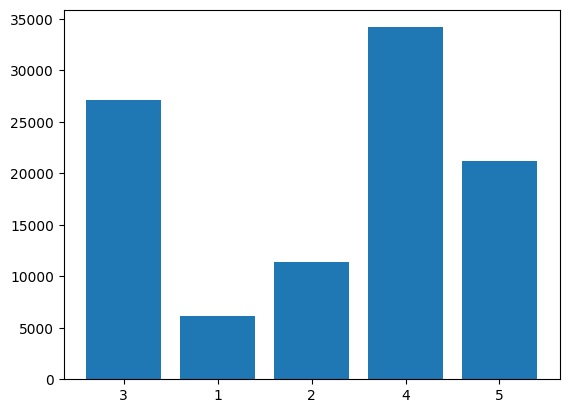

In [23]:
# Gráfico de barras ("histograma")
import matplotlib.pyplot as plt

plt.bar(resultado.keys(), resultado.values())
plt.show()
# Notar que las claves no se encuentran ordenadas

In [24]:
# Ordenar según las claves
ordenado = sorted(resultado.items())
print(ordenado)

[('1', 6110), ('2', 11370), ('3', 27145), ('4', 34174), ('5', 21201)]


In [25]:
#Convertir a un diccionario ordenado
import collections

resultadoOrdenado = collections.OrderedDict(ordenado)
resultadoOrdenado

OrderedDict([('1', 6110),
             ('2', 11370),
             ('3', 27145),
             ('4', 34174),
             ('5', 21201)])

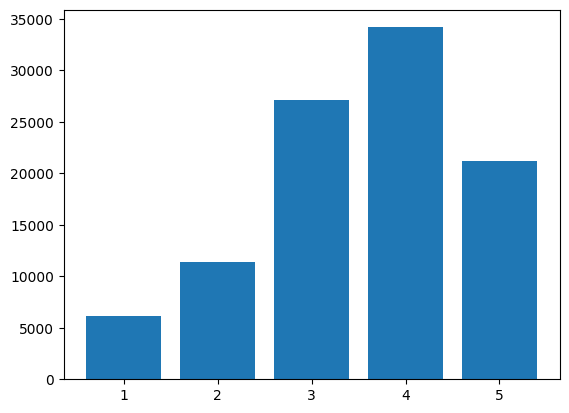

In [26]:
# Gráfico de barras ("histograma")
import matplotlib.pyplot as plt

plt.bar(resultadoOrdenado.keys(), resultadoOrdenado.values())
plt.show()

### Tupla con nombre

In [27]:
from collections import namedtuple

# Tupla con nombre llamada "Tupla"
Tupla = namedtuple("Tupla", ["nombre1", "nombre2"])

# Creación de una tupla
t = Tupla(40, 25)

In [28]:
# Acceso al primer elemento de la tupa
print(t[0])          # Usando el índice
print(t.nombre1)     # Usando el nombre del elemento (similar a un atributo)

40
40


## **Ejemplo 4**

In [29]:
# Lectura del archivo
f = sc.textFile("DowJones19.csv")

f.take(3)

['Date,Open,High,Low,Close,Adj Close,Volume',
 '2014-10-27,16796.099609,16836.980469,16729.830078,16817.939453,16817.939453,72580000',
 '2014-10-28,16825.189453,17006.449219,16825.189453,17005.750000,17005.750000,83870000']

In [30]:
# Recuperar los nombres de la primera fila (como una lista)
header = f.first()
header

'Date,Open,High,Low,Close,Adj Close,Volume'

In [31]:
header_list = header.split(",")
header_list

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [32]:
header_list[5] = "Adj_Close"
header_list

['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']

In [33]:
# Preprocesamiento: creación de una tupla con nombre para cada fila
# Requiere: from collections import namedtuple
Record = namedtuple("Record", header_list)

# Ejemplo de uso de tupla "Record"
tupla = Record('2014-10-27', 16796.099609,16836.980469,16729.830078,16817.939453,16817.939453,72580000)

print(tupla)
print("Campo Volumen:", tupla.Volume)

Record(Date='2014-10-27', Open=16796.099609, High=16836.980469, Low=16729.830078, Close=16817.939453, Adj_Close=16817.939453, Volume=72580000)
Campo Volumen: 72580000


In [34]:
# Eliminar la primera fila de los datos
f2 = f.filter(lambda x: x!= header)
f2.take(3)

['2014-10-27,16796.099609,16836.980469,16729.830078,16817.939453,16817.939453,72580000',
 '2014-10-28,16825.189453,17006.449219,16825.189453,17005.750000,17005.750000,83870000',
 '2014-10-29,17005.070313,17065.500000,16895.380859,16974.310547,16974.310547,76450000']

In [35]:
# Ejemplo de "parsing": separación de cada elemento del primer componente
elems = f2.first().split(',')
# print(elems)

# Creación de una tupla usando cada elemento por separado
tupla = Record(elems[0], float(elems[1]), float(elems[2]), float(elems[3]),
               float(elems[4]), float(elems[5]), float(elems[6]))
tupla

Record(Date='2014-10-27', Open=16796.099609, High=16836.980469, Low=16729.830078, Close=16817.939453, Adj_Close=16817.939453, Volume=72580000.0)

In [36]:
# Creación de una tupla usando *map
tupla = Record(elems[0], *map(float, elems[1:]))
tupla

Record(Date='2014-10-27', Open=16796.099609, High=16836.980469, Low=16729.830078, Close=16817.939453, Adj_Close=16817.939453, Volume=72580000.0)

In [37]:
# Convertir cada fila en una tupla con nombre
def parse(x):
  campos = x.split(",")
  return Record(campos[0], *map(float, campos[1:]))

# Apliar la función de conversión y almacenar en caché (persistencia de memoria)
datos = f2.map(parse).cache()
datos.take(3)

[Record(Date='2014-10-27', Open=16796.099609, High=16836.980469, Low=16729.830078, Close=16817.939453, Adj_Close=16817.939453, Volume=72580000.0),
 Record(Date='2014-10-28', Open=16825.189453, High=17006.449219, Low=16825.189453, Close=17005.75, Adj_Close=17005.75, Volume=83870000.0),
 Record(Date='2014-10-29', Open=17005.070313, High=17065.5, Low=16895.380859, Close=16974.310547, Adj_Close=16974.310547, Volume=76450000.0)]

In [38]:
# Mínima fecha
datos.map(lambda x: x.Date).min()

'2014-10-27'

In [39]:
# Máxima fecha
datos.map(lambda x: x.Date).max()

'2019-10-25'

In [40]:
# Suma de los volúmenes
datos.map(lambda x: x.Volume).sum()

289633540000.0

In [41]:
# Conversión a clave valor, donde la clave es el mes (y año)
# datos.map(lambda x: (x.Date[0:7], x.Volume)).take(3)
datos_mes = datos.map(lambda x: (x.Date[:7], x))
datos_mes.take(3)

[('2014-10',
  Record(Date='2014-10-27', Open=16796.099609, High=16836.980469, Low=16729.830078, Close=16817.939453, Adj_Close=16817.939453, Volume=72580000.0)),
 ('2014-10',
  Record(Date='2014-10-28', Open=16825.189453, High=17006.449219, Low=16825.189453, Close=17005.75, Adj_Close=17005.75, Volume=83870000.0)),
 ('2014-10',
  Record(Date='2014-10-29', Open=17005.070313, High=17065.5, Low=16895.380859, Close=16974.310547, Adj_Close=16974.310547, Volume=76450000.0))]

In [42]:
# Volúmenes de cada mes

# Reducir la tupla a (fecha, volumen)
datos_mes_volumen = datos_mes.mapValues(lambda x: x.Volume)
datos_mes_volumen.take(3)

[('2014-10', 72580000.0), ('2014-10', 83870000.0), ('2014-10', 76450000.0)]

In [43]:
# Volúmen total de cada mes (reduce)
volumen_mes = datos_mes_volumen.reduceByKey(lambda x,y: x+y)
volumen_mes.take(5)

[('2014-10', 434690000.0),
 ('2014-11', 1516490000.0),
 ('2014-12', 2216900000.0),
 ('2015-01', 2173260000.0),
 ('2015-02', 1751250000.0)]

In [44]:
# Volúmenes más altos por mes
volumen_mes.top(5, lambda x: x[1])

[('2018-02', 9450250000.0),
 ('2018-01', 9116920000.0),
 ('2018-03', 8873040000.0),
 ('2018-10', 8373350000.0),
 ('2019-08', 8170730000.0)]

In [45]:
# Asignar un formato a la salida y grabar
salida = volumen_mes.map(lambda x: ",".join(map(str,x)))
salida.take(3)

['2014-10,434690000.0', '2014-11,1516490000.0', '2014-12,2216900000.0']

In [46]:
# Almacenar (en una sola partición)
salida.repartition(1).saveAsTextFile("/content/salida_ejm4")